## Emotion Recognition Using Text
## Text Classification
## 

In [445]:
import pandas as pd
import numpy as np

In [446]:
data = pd.read_csv('text_emotion.csv')

In [447]:
data = data.drop(data[data.sentiment == 'anger'].index)
data = data.drop(data[data.sentiment == 'boredom'].index)
data = data.drop(data[data.sentiment == 'enthusiasm'].index)
data = data.drop(data[data.sentiment == 'empty'].index)
data = data.drop(data[data.sentiment == 'fun'].index)
data = data.drop(data[data.sentiment == 'relief'].index)
data = data.drop(data[data.sentiment == 'surprise'].index)
data = data.drop(data[data.sentiment == 'love'].index)
data = data.drop(data[data.sentiment == 'hate'].index)
data = data.drop(data[data.sentiment == 'worry'].index)

In [448]:
data['sentiment'].value_counts()

neutral      8638
happiness    5209
sadness      5165
Name: sentiment, dtype: int64

In [449]:
#Making all letters lowercase
data['content'] = data['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [450]:
#Removing Punctuation, Symbols
data['content'] = data['content'].str.replace('[^\w\s]',' ')


C:\Users\HP\AppData\Local\Temp/ipykernel_18888/2174452446.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['content'] = data['content'].str.replace('[^\w\s]',' ')


In [451]:
!pip install nltk

You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [452]:
#Removing Stop Words using NLTK
from nltk.corpus import stopwords

In [453]:
stop = stopwords.words('english')
data['content'] = data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [454]:
!pip install textblob

You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [455]:
from textblob import Word

In [456]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [457]:
data['content'] = data['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [458]:
import re

In [459]:
def de_repeat(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

In [460]:
data['content'] = data['content'].apply(lambda x: " ".join(de_repeat(x) for x in x.split()))

In [461]:
freq = pd.Series(' '.join(data['content']).split()).value_counts()[-10000:]

In [462]:
freq = list(freq.index)
data['content'] = data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [463]:
from sklearn.preprocessing import LabelEncoder

In [464]:
le = LabelEncoder()

In [465]:
y = le.fit_transform(data.sentiment.values)

In [466]:
from sklearn.model_selection import train_test_split

In [467]:
X_train, X_val, y_train, y_val = train_test_split(data.content.values, y, random_state=42, test_size=0.5)

In [468]:
from sklearn.feature_extraction.text import CountVectorizer


In [469]:
count_vect = CountVectorizer(analyzer='word')

In [470]:
count_vect.fit(data['content'])

CountVectorizer()

In [471]:
X_train_count =  count_vect.transform(X_train)
X_val_count =  count_vect.transform(X_val)

In [472]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [473]:
from sklearn.linear_model import SGDClassifier

In [474]:
lsvm = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None)

In [475]:
lsvm.fit(X_train_count, y_train)

SGDClassifier(alpha=0.001, max_iter=15, random_state=5, tol=None)

In [476]:
lvsm_pred = lsvm.predict(X_val_count)

In [477]:
print('svm using count accuracy %s' % accuracy_score(lvsm_pred, y_val))

svm using count accuracy 0.6055123080159899


In [478]:
from sklearn.linear_model import LogisticRegression

In [479]:
lr = LogisticRegression(C=1)

In [480]:
lr.fit(X_train_count, y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [481]:
lr_preds = lr.predict(X_val_count)

In [482]:
print('lr using count accuracy %s' % accuracy_score(lr_preds, y_val))

lr using count accuracy 0.5945718493583


In [483]:
from sklearn.tree import DecisionTreeClassifier

In [484]:
dt = DecisionTreeClassifier()

In [485]:
dt.fit(X_train_count, y_train)

DecisionTreeClassifier()

In [486]:
dt_preds = dt.predict(X_val_count)

In [487]:
print('dt using count accuracy %s' % accuracy_score(dt_preds, y_val))

dt using count accuracy 0.5305070481800968


In [488]:
from sklearn.ensemble import RandomForestClassifier

In [489]:
rf = RandomForestClassifier()

In [490]:
rf.fit(X_train_count, y_train)

RandomForestClassifier()

In [491]:
rf_preds = rf.predict(X_val_count)

In [492]:
print("rf using count accuracy %s" % accuracy_score(rf_preds, y_val))

rf using count accuracy 0.5838417841363349


In [493]:
from sklearn.naive_bayes import MultinomialNB

In [494]:
nb = MultinomialNB()

In [495]:
nb.fit(X_train_count, y_train)

MultinomialNB()

In [496]:
nb_preds = nb.predict(X_val_count)

In [497]:
print("nb using count accuracy %s" % accuracy_score(nb_preds, y_val))

nb using count accuracy 0.5617504733852304


c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


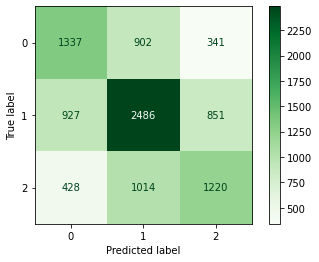

In [498]:
plot_confusion_matrix(dt, X_val_count, y_val, cmap='Greens')

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


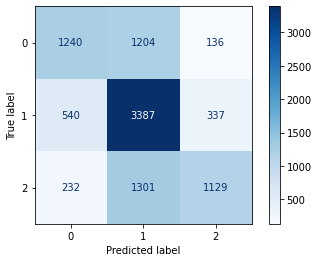

In [499]:
plot_confusion_matrix(lsvm, X_val_count, y_val, cmap='Blues')

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


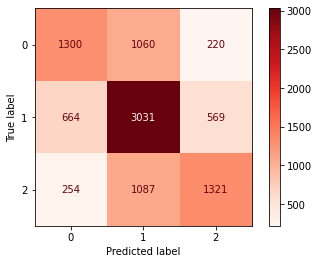

In [500]:
plot_confusion_matrix(lr, X_val_count, y_val, cmap='Reds')

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


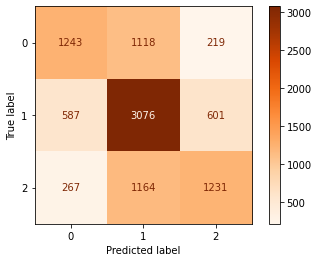

In [501]:
plot_confusion_matrix(rf, X_val_count, y_val, cmap='Oranges')

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


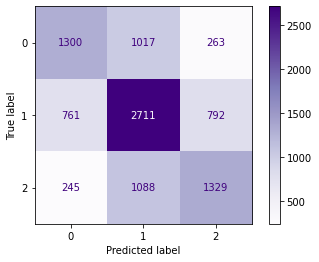

In [502]:
plot_confusion_matrix(nb, X_val_count, y_val, cmap='Purples')

In [503]:
tweets = pd.DataFrame(['I am very happy today! The atmosphere looks cheerful',
'Things are looking great. It was such a good day',
'Success is right around the corner. Lets celebrate this victory',
'Everything is more beautiful when you experience them with a smile!',
'Now this is my worst, okay? But I am gonna get better.',
'I am tired, boss. Tired of being on the road, lonely as a sparrow in the rain. I am tired of all the pain I feel',
'This is quite depressing. I am filled with sorrow',
'His death broke my heart. It was a sad day'])

# Doing some preprocessing on these tweets as done before 
tweets[0] = tweets[0].str.replace('[^\w\s]',' ')
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets[0] = tweets[0].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
from textblob import Word
tweets[0] = tweets[0].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# Extracting Count Vectors feature from our tweets
tweet_count = count_vect.transform(tweets[0])

#Predicting the emotion of the tweet using our already trained linear SVM
tweet_pred = lsvm.predict(tweet_count)
print(tweet_pred)
## result 
## [0 0 0 0 1 1 1 1]  
### 0 = happy, 1 = sad, 2 = neutral

[0 0 1 0 1 2 1 2]


C:\Users\HP\AppData\Local\Temp/ipykernel_18888/1420208603.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets[0] = tweets[0].str.replace('[^\w\s]',' ')
